In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file1 = "/data2/home/prasannaiyer/Projects/TT_Fastai/Dataset/OTD_2019_PU.csv"
inpDf = pd.read_csv(file1)

In [3]:
#inpDf = inpDf[(inpDf['Days Late']<20)&((inpDf['Location Type']=='Plant')\
 #   |(inpDf['Location Type']=='Port')|(inpDf['Location Type']=='Keen'))]
inpDf = inpDf[((inpDf['Location Type']=='Plant')|(inpDf['Location Type']=='Port')|(inpDf['Location Type']=='Keen'))]

In [4]:
inpDf['Delivery_Date'] = pd.to_datetime(inpDf['Shipment End Date'])
inpDf['Pickup_Date'] = pd.to_datetime(inpDf['First shipped date (first YT26 action) Date'])
#inpDf['OutputTransitTime'] = (inpDf['Delivery_Date']-inpDf['Pickup_Date']).dt.days
inpDf.rename(columns = {'Shipment Secure Resources Upd Dt':'Tender_Date'},inplace = True)
inpDf['Tender_Date'] = pd.to_datetime(inpDf['Tender_Date'])
inpDf['OD'] = [1 if OD > 0 else 0 for OD in inpDf['Shipment OD Day']]

For analysis, keep features that are available prior to the delivery of the shipment and drop the features that are pertaining to delivery

In [5]:
inpDf.drop(['Shipment GID', 'Delivery Status','Shipment Source Location GID',\
    'Shipment Source Province Code','Shipment Destination Location GID',\
        'Shipment Destination Location Name', 'Shipment Destination City',\
            'Shipment Enroute Status Upd Dt','Vehicle Outbound Delivery tendered and accepted Date',\
                'First shipped date (first YT26 action) Date', 'Shipment End Date',\
                    'Expected Days to Deliver', 'Days Late','Year',\
                        'Month','Shipment OD Day','Pickup_Date','Delivery_Date'],\
                            inplace = True,axis=1)

<b>Actual Days:</b> Based on describe and kde plot <br> There are outlier values. Based on domain knowledge of shipment profile and distance covered per day, Actual Days > 15 calendar days can be considered as outliers <br> Also, the outliers predominantly appear in the plant locations. Further investigation of the process is recommended to identify the breakdowns that are resulting in meaningless transit time

In [6]:
inpDf['Actual Days'].describe()

count    17586.000000
mean         6.027408
std          6.371589
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        373.000000
Name: Actual Days, dtype: float64

(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,
         80.,  90., 100., 110., 120., 130., 140., 150., 160., 170., 180.,
        190., 200., 210., 220., 230., 240., 250., 260., 270., 280., 290.,
        300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.]),
 <a list of 44 Text xticklabel objects>)

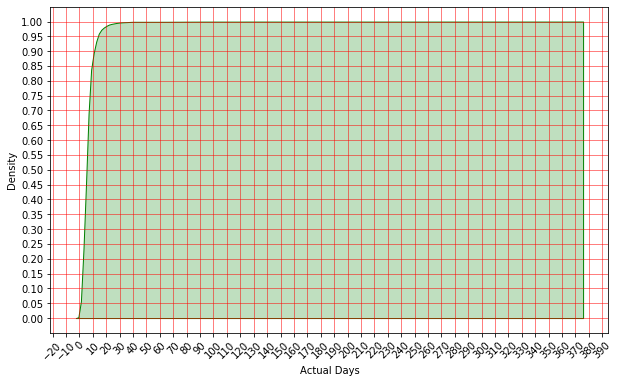

In [7]:
fig = plt.figure(figsize = (10, 6))
ax = sns.kdeplot(inpDf['Actual Days'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)

Text(0.5, 1.0, 'DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - OUTLIERS')

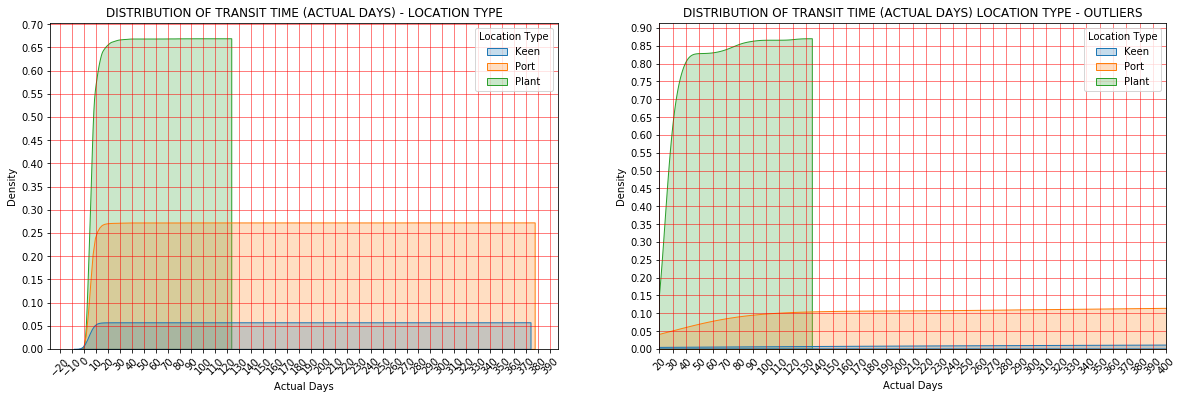

In [8]:
fig = plt.figure(figsize = (20, 6))
fig.add_subplot(1,2,1)
ax = sns.kdeplot(inpDf['Actual Days'], hue = inpDf['Location Type'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
ax.set_title('DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) - LOCATION TYPE')
fig.add_subplot(1,2,2)
ax = sns.kdeplot(inpDf[inpDf['Actual Days']>20]['Actual Days'], hue = inpDf['Location Type'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.set_xlim(left = 20, right = 400)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
ax.set_title('DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - OUTLIERS')


Text(0.5, 1.0, 'DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - WITHOUT OUTLIERS')

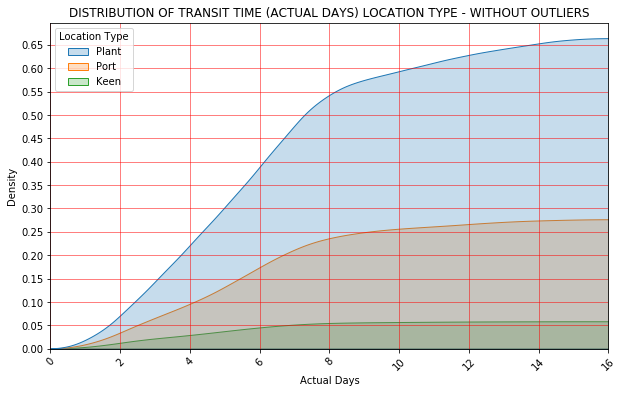

In [9]:
plt.figure(figsize = (10, 6))
df = inpDf.loc[(inpDf['Actual Days']<=15) & (inpDf['Actual Days']>0),:]
#df = inpDf.loc[inpDf['Actual Days']<16 ,:]
ax = sns.kdeplot(df['Actual Days'], hue = df['Location Type'], color='g', shade = True, cumulative = True)
#ax = sns.kdeplot(data = inpDf['Actual Days'], cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.xticks(rotation=45)
sns.move_legend(ax, loc = 'upper left')
ax.set_title('DISTRIBUTION OF TRANSIT TIME (ACTUAL DAYS) LOCATION TYPE - WITHOUT OUTLIERS')

One of the important steps in data exploration is to look for null values and replace them appropriately [delete or impute]. <br> In this dataset there are not any null values

In [10]:
inpDf.isnull().sum().sort_values(ascending = False)

OD                                    0
Domestic/Import/Export/SPV            0
Shipment Loaded Distance              0
Shipment Num Stops                    0
Shipment Number of Orders             0
Actual Days                           0
Tender_Date                           0
Location Type                         0
Shipment Destination Province Code    0
Shipment Source City                  0
Shipment Source Location Name         0
Shipment Service Provider GID         0
dtype: int64

<b>Analysis of Shipment Tenders </b>

Additional features can be created from date features and insights can be gained from these new features

In [11]:
inpDf['Tender_Day']=inpDf['Tender_Date'].dt.day
inpDf['Tender_DoW'] = inpDf['Tender_Date'].dt.dayofweek
inpDf['Tender_Month'] = inpDf['Tender_Date'].dt.month

<b>Plants:</b> 12.5% more shipments are tendered on Mondays compared to other days of the week.<br> 
This is important as shipments tendered on Monday are more likely to be delivered within the week <br>
<b>Non Plant Locations:</b> The opposite trend is observed. 15% - 20% more shipments are tendered between Monday & Friday

In [12]:
tenderDf = pd.DataFrame()
tenderDf['Location Type'] =''
tenderDf['Mon_Shipment_Count'] = ''
tenderDf['Non_Mon_Shipment_Count'] = ''
tenderDf['Avg_By_Day'] = ''
#tenderDf.loc[0] = ['Port',allMonShipments,allMonNonPlant]
i = 0
for locType in ['Plant', 'Port', 'Keen']:
    monShipments = inpDf[(inpDf['Tender_DoW'] == 0) & (inpDf['Location Type'] == locType)]['Tender_DoW'].count().astype(int)
    nonMonShipments = int(inpDf[(inpDf['Tender_DoW'].isin([1,2,3,4])) & (inpDf['Location Type'] == locType)]['Tender_DoW'].value_counts().mean())
    avgByDay = int(inpDf[(inpDf['Tender_DoW'].isin([0,1,2,3,4])) & (inpDf['Location Type'] == locType)]['Tender_DoW'].value_counts().mean())
    tenderDf.loc[i] = [locType, monShipments, nonMonShipments, avgByDay]
    i += 1

In [13]:
tenderDf

,Location Type,Mon_Shipment_Count,Non_Mon_Shipment_Count,Avg_By_Day
0,Plant,2595,2267,2333
1,Port,837,967,941
2,Keen,174,209,202


Text(0.5, 1.0, 'DISTRIBUTION OF SHIPMENTS BY TENDER DoW')

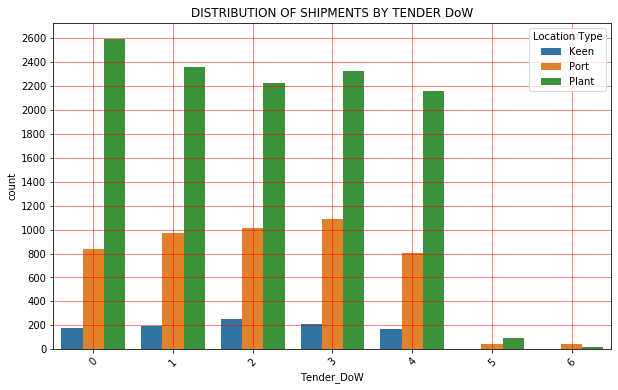

In [14]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = inpDf, x = 'Tender_DoW',hue = 'Location Type')
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
sns.move_legend(ax, loc = 'upper right')
ax.set_title('DISTRIBUTION OF SHIPMENTS BY TENDER DoW')

snsPlot is a wrapper function to speed up Seaborn category plots. This is accomplished by including settings commonly within the function. <br> The common settings are figure size, grid style, rotation of x-axis labels, position of the legend and title. <br> Highly recommend creating wrapper functions that contain personal preferences to speed up charting

In [15]:
def snsPlot(chartType, data, title, x = None, y = None, hue = None, plotCount = 1, order = False):
    orderIndex = None
    if (y != None) & (order == True):
        orderIndex = data.groupby(by = [x])[y].mean().sort_values(ascending = False).index
    elif order:
        orderIndex = data[x].value_counts().sort_values(ascending = False).index
    plt.figure(figsize = (10,6))
    fGrid = sns.catplot(data = data, x = x, y = y, hue = hue, kind = chartType, height = 6, aspect = 1.52, order = orderIndex)
    ax = fGrid.axes[0,0]
    ax.grid(linestyle='-', linewidth='0.5', color='red')
    #ax.set_xlim(left = 0, right = 16)
    #ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    #ax.yaxis.set_major_locator(plt.MultipleLocator(200))
    plt.xticks(rotation=45)
    if hue: sns.move_legend(fGrid, loc = 'upper right', bbox_to_anchor=(0.78, 0.95))
    fGrid.legend_out = False
    ax.set_title(title)

   

<Figure size 720x432 with 0 Axes>

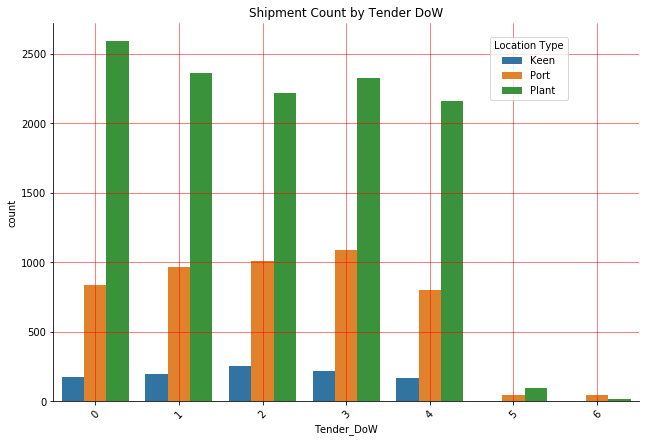

In [16]:
snsPlot('count', inpDf, x = 'Tender_DoW', hue = 'Location Type', title = 'Shipment Count by Tender DoW', order = False)

<b>Analysis of Shipment Distance</b>

Based on the distribution of distance, shipments with distance > 2500 miles seem like outliers. <br> After eliminating the outliers, average distance of the shipments = 820 miles <br> Median distance of the shipments = 742 miles <br> 96% of the shipments travel less than 2000 miles <br> Shipments originating from plant locations travel 8.5% greater distance than the overall distance average. It is important to note that 67% of all shipments originate from plant. Plants shipments travel 28% farther than port shipments

Text(0.5, 1.0, 'DISTRIBUTION OF SHIPMENT DISTANCE BY LOCATION TYPE')

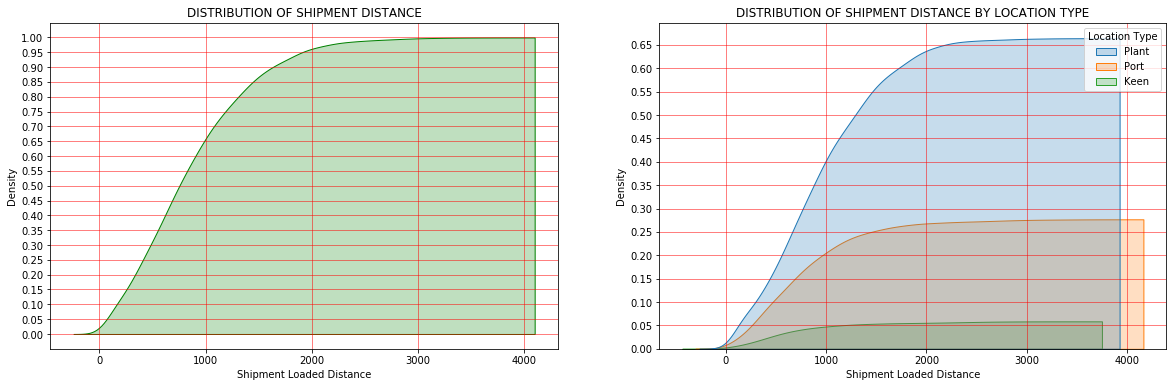

In [17]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
ax = sns.kdeplot(df['Shipment Loaded Distance'], color='g', shade = True, cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.set_title('DISTRIBUTION OF SHIPMENT DISTANCE')
fig.add_subplot(1,2,2)
ax = sns.kdeplot(df['Shipment Loaded Distance'], hue = df['Location Type'], color='g', shade = True, cumulative = True)
ax.grid(linestyle='-', linewidth='0.5', color='red')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.set_title('DISTRIBUTION OF SHIPMENT DISTANCE BY LOCATION TYPE')
#snsPlot('count', data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

In [18]:
df[df['Shipment Loaded Distance']<2500]['Shipment Loaded Distance'].describe()

count    16741.000000
mean       820.812287
std        534.116662
min          0.000000
25%        404.900000
50%        742.500000
75%       1163.700000
max       2497.300000
Name: Shipment Loaded Distance, dtype: float64

In [19]:
distanceDf = pd.DataFrame()
distanceDf['Location Type'] =''
distanceDf['Avg_Distance'] = ''
distanceDf['Median_Distance'] = ''
distanceDf['Shipment_Count'] =''
i = 0
for locType in ['Plant', 'Port', 'Keen']:
    avgDistance = int(inpDf[(inpDf['Shipment Loaded Distance'] < 2501) & (inpDf['Location Type'] == locType)]['Shipment Loaded Distance'].mean())
    medianDistance = int(inpDf[(inpDf['Shipment Loaded Distance'] < 2501) & (inpDf['Location Type'] == locType)]['Shipment Loaded Distance'].median())
    shipmentCount = int(inpDf[(inpDf['Shipment Loaded Distance'] < 2501) & (inpDf['Location Type'] == locType)]['Location Type'].count())
    distanceDf.loc[i] = [locType, avgDistance, medianDistance, shipmentCount]
    i += 1
avgDistance = int(inpDf[(inpDf['Shipment Loaded Distance'] < 2501)]['Shipment Loaded Distance'].mean())
medianDistance = int(inpDf[inpDf['Shipment Loaded Distance'] < 2501]['Shipment Loaded Distance'].median())
shipmentCount = int(inpDf[(inpDf['Shipment Loaded Distance'] < 2501)]['Location Type'].count())
distanceDf.loc[i] = ['All', avgDistance, medianDistance, shipmentCount]
distanceDf

,Location Type,Avg_Distance,Median_Distance,Shipment_Count
0,Plant,895,839,11681
1,Port,699,633,4716
2,Keen,610,472,991
3,All,825,746,17388


<Figure size 720x432 with 0 Axes>

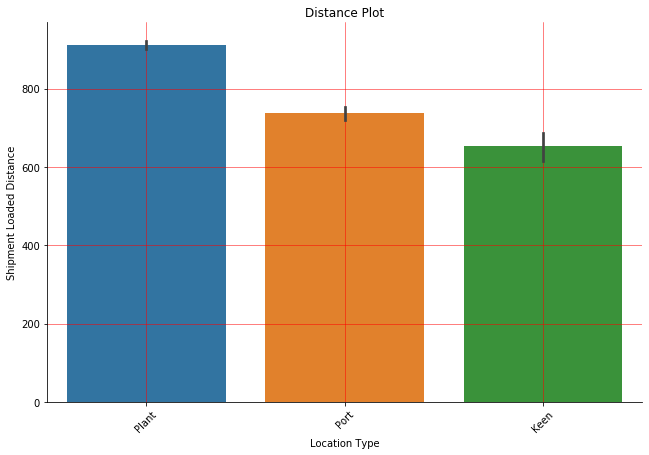

In [20]:
snsPlot('bar',inpDf,"Distance Plot",x = 'Location Type', y = 'Shipment Loaded Distance', order = True)

<Figure size 720x432 with 0 Axes>

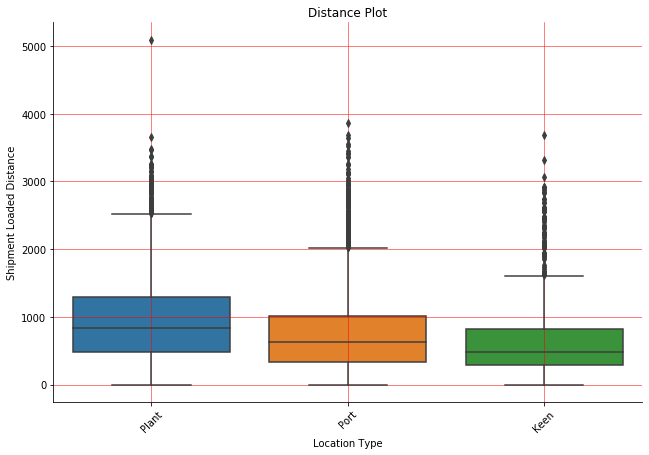

In [21]:
snsPlot('box',inpDf,"Distance Plot",x = 'Location Type', y = 'Shipment Loaded Distance', order = True)

Text(0.5, 1.0, 'Shipment Count by Plant')

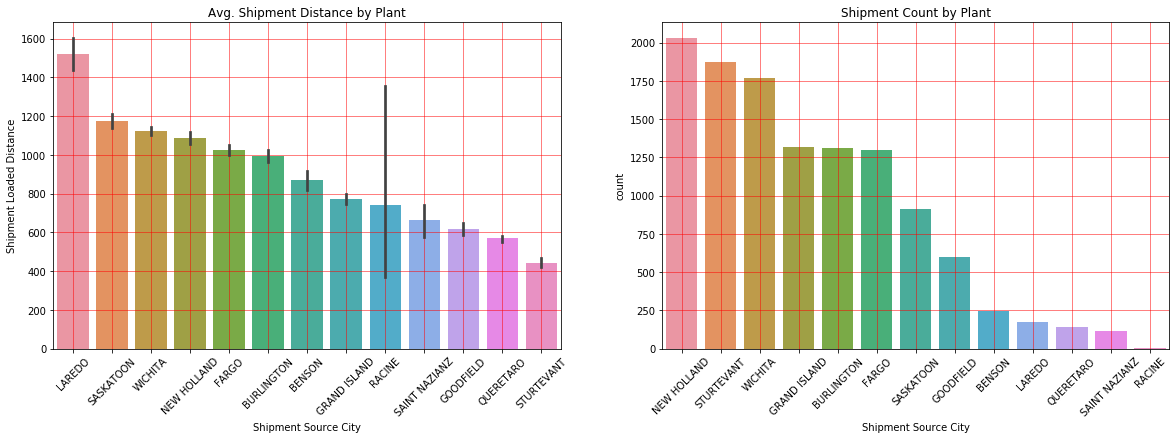

In [22]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
#snsPlot('bar', data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', \
 #   y = 'Shipment Loaded Distance', title = 'Avg. Shipment Distance by Plant', order = True)
order = inpDf[inpDf['Location Type']=='Plant'].groupby(by = 'Shipment Source City')['Shipment Loaded Distance'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', y = 'Shipment Loaded Distance', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
#sns.move_legend(ax, loc = 'upper right')
ax.set_title('Avg. Shipment Distance by Plant')
fig.add_subplot(1,2,2)
order = inpDf[inpDf['Location Type']=='Plant']['Shipment Source City'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
plt.xticks(rotation=45)
ax.set_title('Shipment Count by Plant')
#snsPlot('count', data = inpDf[inpDf['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

<b> Analysis of STOPS PER SHIPMENT 

In [23]:
df = df[df['Shipment Loaded Distance']<2501]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16741 entries, 660 to 20980
Data columns (total 12 columns):
Shipment Service Provider GID         16741 non-null object
Shipment Source Location Name         16741 non-null object
Shipment Source City                  16741 non-null object
Shipment Destination Province Code    16741 non-null object
Location Type                         16741 non-null object
Tender_Date                           16741 non-null datetime64[ns]
Actual Days                           16741 non-null int64
Shipment Number of Orders             16741 non-null int64
Shipment Num Stops                    16741 non-null int64
Shipment Loaded Distance              16741 non-null float64
Domestic/Import/Export/SPV            16741 non-null object
OD                                    16741 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.7+ MB


In [28]:
df['Shipment Num Stops'].describe()

count    16741.000000
mean         2.767577
std          1.027130
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Shipment Num Stops, dtype: float64

<Figure size 720x432 with 0 Axes>

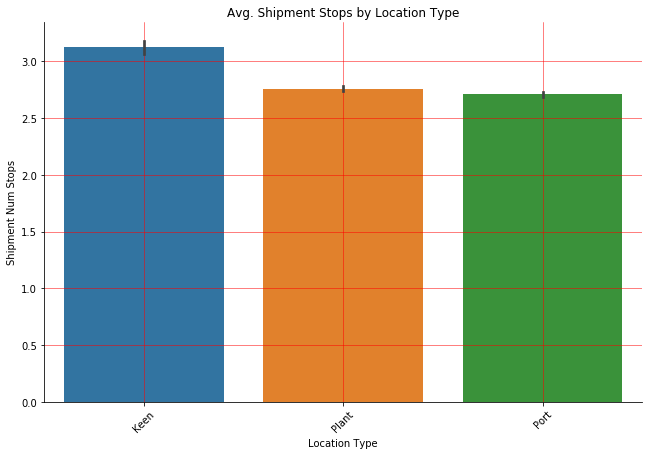

In [26]:
snsPlot('bar', df, 'Avg. Shipment Stops by Location Type', x = 'Location Type', y = 'Shipment Num Stops', order = True)

<Figure size 720x432 with 0 Axes>

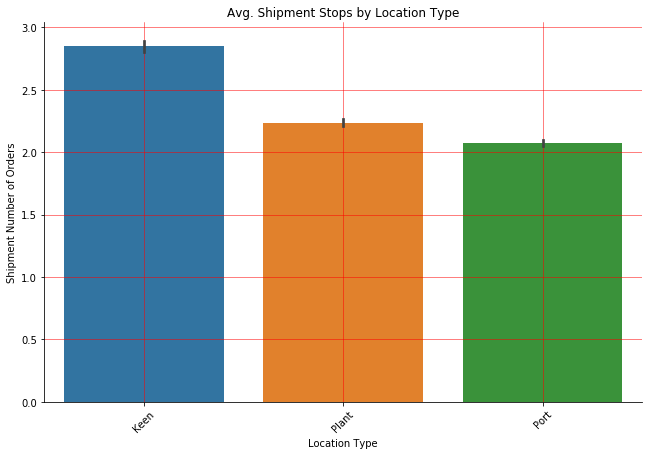

In [27]:
snsPlot('bar', df, 'Avg. Shipment Order Count by Location Type', x = 'Location Type', y = 'Shipment Number of Orders', order = True)

<Figure size 720x432 with 0 Axes>

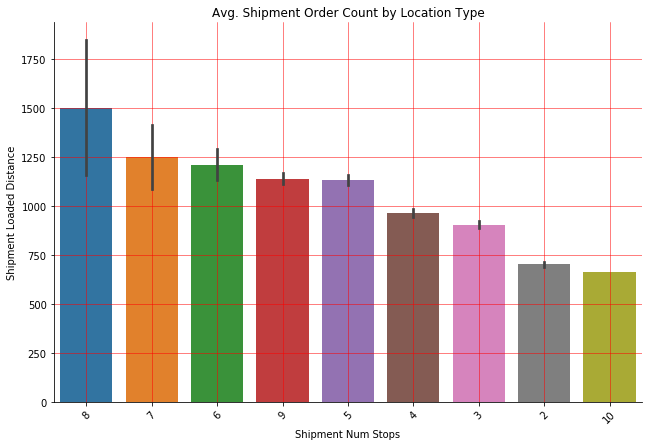

In [29]:
snsPlot('bar', df, 'Avg. Shipment Order Count by Location Type', x = 'Shipment Num Stops', y = 'Shipment Loaded Distance', order = True)

Text(0.5, 1.0, 'Shipment Count by Stop Count')

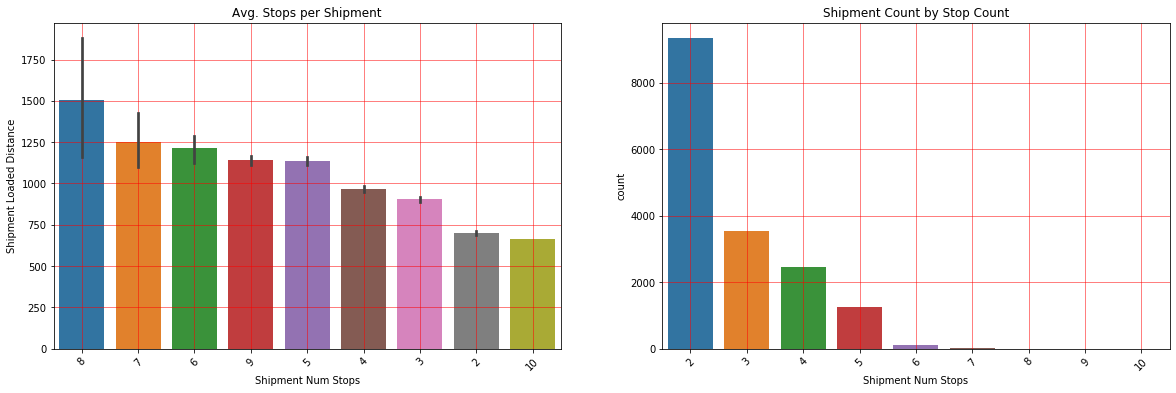

In [35]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
#snsPlot('bar', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', \
 #   y = 'Shipment Loaded Distance', title = 'Avg. Shipment Distance by Plant', order = True)
order = df.groupby(by = 'Shipment Num Stops')['Shipment Loaded Distance'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = df, x = 'Shipment Num Stops', y = 'Shipment Loaded Distance', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
#sns.move_legend(ax, loc = 'upper right')
ax.set_title('Avg. Stops per Shipment')
fig.add_subplot(1,2,2)
order = df['Shipment Num Stops'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = df, x = 'Shipment Num Stops', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
plt.xticks(rotation=45)
ax.set_title('Shipment Count by Stop Count')
#sns.move_legend(ax, loc = 'upper right')
#snsPlot('count', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)

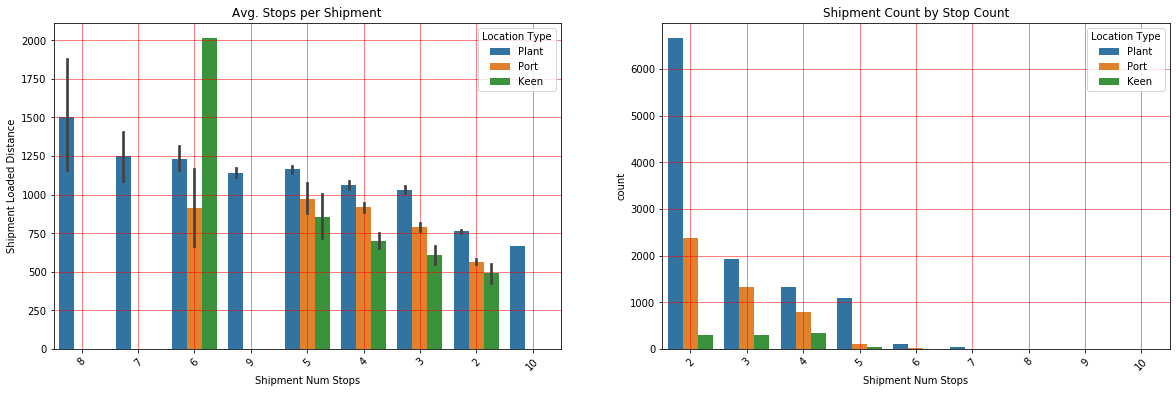

In [33]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
#snsPlot('bar', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', \
 #   y = 'Shipment Loaded Distance', title = 'Avg. Shipment Distance by Plant', order = True)
order = df.groupby(by = 'Shipment Num Stops')['Shipment Loaded Distance'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = df, x = 'Shipment Num Stops', y = 'Shipment Loaded Distance', hue = 'Location Type', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
#ax.set_xlim(left = 0, right = 16)
#ax.xaxis.set_major_locator(plt.MultipleLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(200))
plt.xticks(rotation=45)
sns.move_legend(ax, loc = 'upper right')
ax.set_title('Avg. Stops per Shipment')
fig.add_subplot(1,2,2)
order = df['Shipment Num Stops'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = df, x = 'Shipment Num Stops', hue = 'Location Type', order = order)
ax.grid(linestyle='-', linewidth='0.5', color='red')
plt.xticks(rotation=45)
ax.set_title('Shipment Count by Stop Count')
sns.move_legend(ax, loc = 'upper right')
#snsPlot('count', data = df[df['Location Type']=='Plant'], x = 'Shipment Source City', title = 'Shipment Count by Plant', order = True)